===========iteration:0===========
std=0.01:2.302541289030065
Xavier:2.3031958753685666
He:2.284192864174882
===========iteration:100===========
std=0.01:2.3020528923751855
Xavier:2.264844655463035
He:1.6527340275724527
===========iteration:200===========
std=0.01:2.3038377993972654
Xavier:2.183380939145198
He:0.9009580218377913
===========iteration:300===========
std=0.01:2.3025176624991186
Xavier:1.941397418860387
He:0.5735636199739524
===========iteration:400===========
std=0.01:2.3024697014209905
Xavier:1.5416096063015257
He:0.4714888508350894
===========iteration:500===========
std=0.01:2.302427698236053
Xavier:0.9925536496703229
He:0.303646859687923
===========iteration:600===========
std=0.01:2.300429154549859
Xavier:0.7385986977696292
He:0.42896475929948186
===========iteration:700===========
std=0.01:2.2985293803410354
Xavier:0.6699997080341304
He:0.3472891106722843
===========iteration:800===========
std=0.01:2.3009200116303967
Xavier:0.43631714167528796
He:0.17082016062347127

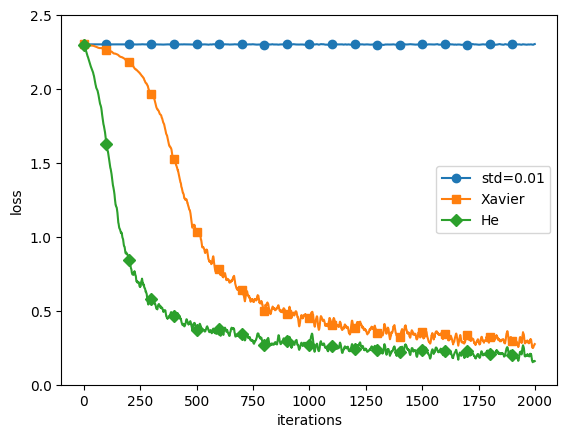

In [2]:
# coding: utf-8
# weight_init_compare.py
import os
import sys

sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:读入MNIST数据==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:进行实验的设置==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:开始训练==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.绘制图形==========
# std 通常是 standard deviation（标准差）
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()